In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
if 'id' in data.columns and 'Unnamed: 32' in data.columns:
    data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
    print("Sütunlar başarıyla silindi.")
    print(data.head())
else:
    print("Belirtilen sütunlar mevcut değil.")


Sütunlar başarıyla silindi.
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...  

In [ ]:
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

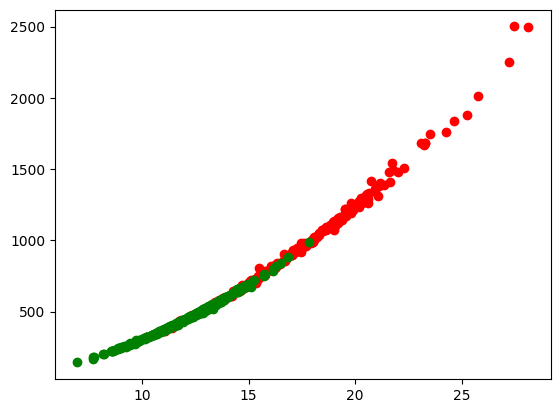

In [ ]:
plt.scatter(M.radius_mean,M.area_mean,color='red',label='kötü')
plt.scatter(B.radius_mean,B.area_mean,color='green',label='iyi')


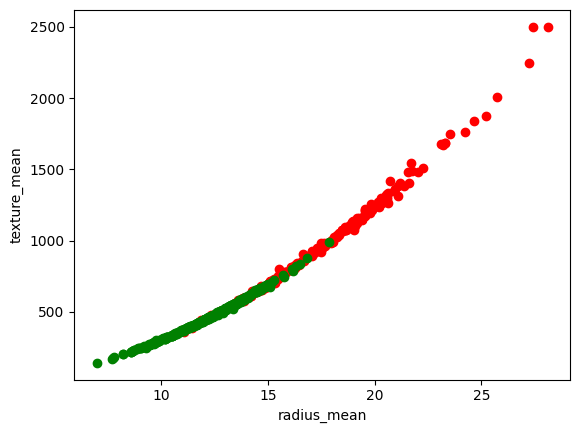

In [ ]:
plt.scatter(M.radius_mean,M.area_mean,color='red',label='kötü')
plt.scatter(B.radius_mean,B.area_mean,color='green',label='iyi')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [ ]:
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

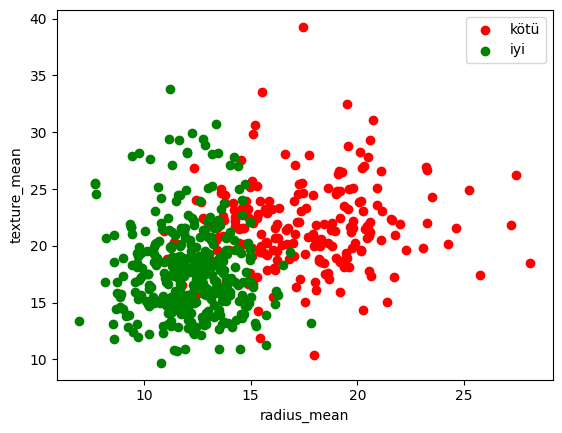

In [ ]:
#Scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color='red',label='kötü')
plt.scatter(B.radius_mean,B.texture_mean,color='green',label='iyi')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()


K-NEAREST NEİGHBOUR WİTH PYTHON

In [ ]:
data.diagnosis=[1 if each=='M' else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(['diagnosis'],axis=1)

In [ ]:
#normalizasyon
import numpy as np

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
#datamı train ve test datası olarak ayıracağım
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbours=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [ ]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
#skor
print("{} nn score : {}".format(3,knn.score(x_test,y_test))) # skor değeri için ben x ve y değerlerini karşılaştırıyorum

3 nn score : 0.9532163742690059


In [ ]:
#peki ben iyi k değerini nasıl bulacağım ? deneyerek
score_list=[]
for each in range(1,15):
  knn2=KNeighborsClassifier(n_neighbors=each)
  knn2.fit(x_train,y_train)
  score_list.append(knn2.score (x_test,y_test))

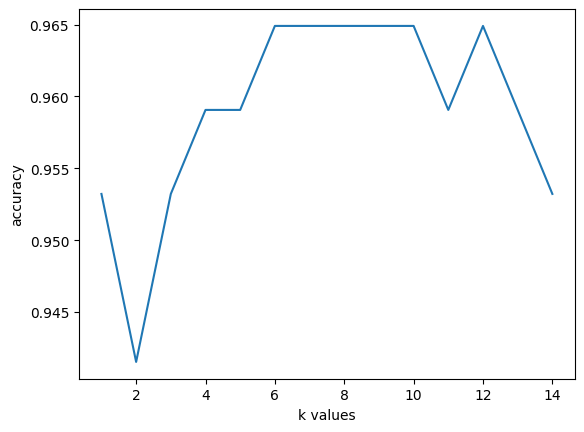

In [ ]:
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [ ]:
#çıktıda görüldüğü gibi k en iyi sonucu 7,8,9 da gösteriyor.